We begin by importing atmosentry, as well as other standard libraries.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import atmosentry
from atmosentry.meteoroid import Meteoroid

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

To run the atmospheric entry model, we must initialise a simulation object.

In [2]:
sim = atmosentry.Simulation()

We can now add an impactor to the simulation; you are free to choose the initial position, velocity and parameters of the impactor here.

In [3]:
# impactor material properties (bulk density, tensile strength, heat of ablation)
rho_imp = 0.6e3 # kg/m^3
eta_imp = 2.5e6 # J/kg
sigma_imp = 1e4 # Pa

theta0 = 45. * np.pi / 180. # impact angle (radians)
V0 = 20e3 # top-of-atmosphere impact velocity

R0 = 500 # initial radius
M0 = rho_imp * (4 * np.pi / 3) * (R0 ** 3) # initial mass

In [4]:
impactor = Meteoroid(x=0,
                     y=0,
                     z=100e3,
                     vx=-V0 * np.cos(theta0),
                     vy=0,
                     vz=-V0 * np.sin(theta0),
                     radius=R0,
                     mass=M0,
                     sigma=sigma_imp,
                     rho=rho_imp,
                     eta=eta_imp)

sim.impactor = impactor

Many global simulation parameters (for example defining the atmospheric profile) are initialised with default values. This is the time to change these if you want! 

We are then able to run the simulation.

In [5]:
sim.Nfrag = 2 # this defines the number of bodies produced at the point of fragmentation

rho0 = 1.225 # atmospheric surface density [kg/m^3]
H = 7.2e3 # atmospheric scale height (for an isothermal atmosphere) [km]

sim.integrate()

We can now extract the trajectory of the impactor (these are recorded in the impactor's state attribute), and determine if fragmentation occured during atmospheric entry.

In [6]:
x, y, z = sim.impactor.state.x, sim.impactor.state.y, sim.impactor.state.z
vx, vy, vz = sim.impactor.state.vx, sim.impactor.state.vy, sim.impactor.state.vz

vel = np.sqrt(vx ** 2 + vy ** 2 + vz ** 2)

radius, mass = sim.impactor.state.radius, sim.impactor.state.mass

# mass, and energy deposition in the atmosphere
dM, dEkin = sim.impactor.state.dM, sim.impactor.state.dEkin

if len(sim.fragments):
    
    for fragment in sim.fragments:
        print(fragment)
    
else:
    print("The impactor did not fragment during atmospheric entry.")

The impactor did not fragment during atmospheric entry.


### Plots

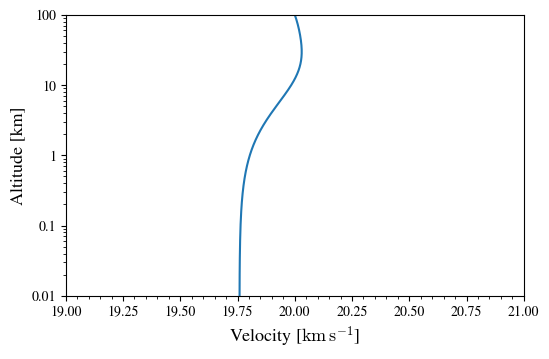

In [7]:
_ = plt.figure(figsize=(5.91, 3.65))

plt.plot(vel / 1e3, z / 1e3)

plt.yscale('log')

plt.xlim(19, 21)
plt.ylim(1e-2, 1e2)
plt.yticks([0.01, 0.1, 1, 10, 100], labels=[0.01, 0.1, 1, 10, 100])

plt.xlabel(r'Velocity [${\rm km\,s}^{-1}$]', fontsize=13)
plt.ylabel(r'Altitude [km]', fontsize=13)

plt.minorticks_on()

plt.show()

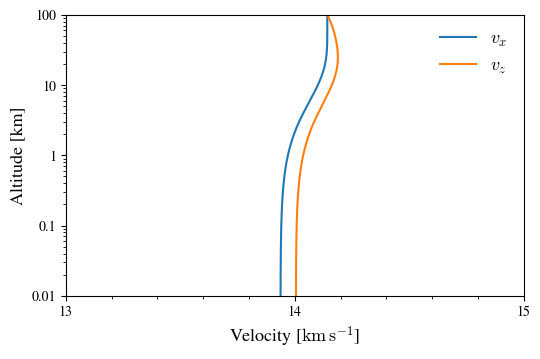

In [8]:
_ = plt.figure(figsize=(5.91, 3.65))

plt.plot(np.abs(vx / 1e3), z / 1e3, label=r'$v_x$')
plt.plot(np.abs(vz / 1e3), z / 1e3, label=r'$v_z$')

plt.yscale('log')

plt.xlim(13, 15)
plt.xticks([13, 14, 15], labels=[13, 14, 15])
plt.ylim(1e-2, 1e2)
plt.yticks([0.01, 0.1, 1, 10, 100], labels=[0.01, 0.1, 1, 10, 100])

plt.xlabel(r'Velocity [${\rm km\,s}^{-1}$]', fontsize=13)
plt.ylabel(r'Altitude [km]', fontsize=13)

plt.minorticks_on()

plt.legend(frameon=False, fontsize=13)

plt.show()

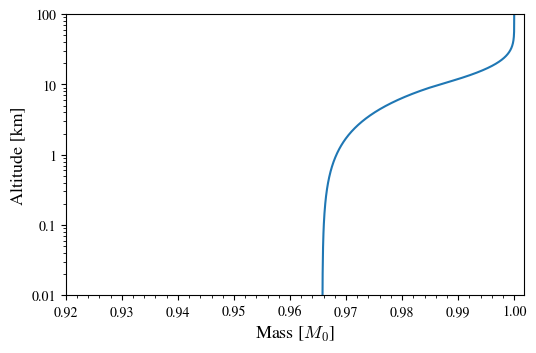

In [9]:
_ = plt.figure(figsize=(5.91, 3.65))

plt.plot(mass / M0, z / 1e3)

plt.yscale('log')

plt.xlim(0.92, )
plt.ylim(1e-2, 1e2)
plt.yticks([0.01, 0.1, 1, 10, 100], labels=[0.01, 0.1, 1, 10, 100])

plt.xlabel(r'Mass [$M_0$]', fontsize=13)
plt.ylabel(r'Altitude [km]', fontsize=13)

plt.minorticks_on()

plt.show()

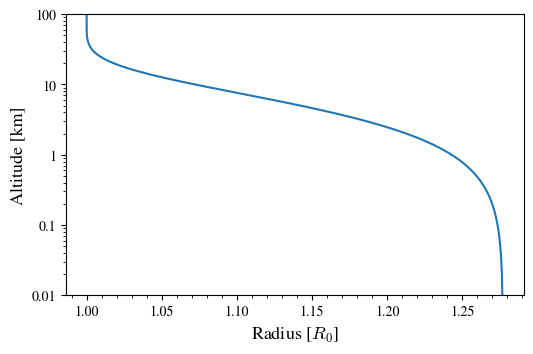

In [10]:
_ = plt.figure(figsize=(5.91, 3.65))

plt.plot(radius / R0, z / 1e3)

plt.yscale('log')

plt.ylim(1e-2, 1e2)
plt.yticks([0.01, 0.1, 1, 10, 100], labels=[0.01, 0.1, 1, 10, 100])

plt.xlabel(r'Radius [$R_0$]', fontsize=13)
plt.ylabel(r'Altitude [km]', fontsize=13)

plt.minorticks_on()

plt.show()

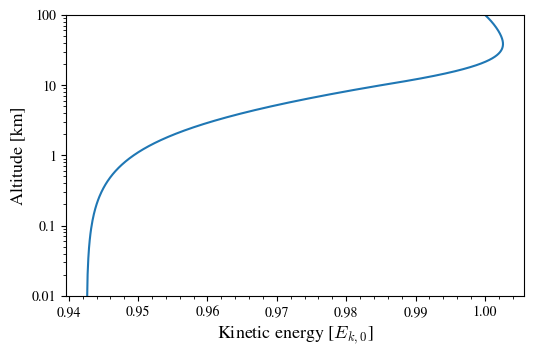

In [11]:
KE0 = 0.5 * M0 * (V0 ** 2)

_ = plt.figure(figsize=(5.91, 3.65))

plt.plot(0.5 * mass * (vel ** 2) / KE0, z / 1e3)

plt.yscale('log')

plt.ylim(1e-2, 1e2)
plt.yticks([0.01, 0.1, 1, 10, 100], labels=[0.01, 0.1, 1, 10, 100])

plt.xlabel(r'Kinetic energy [$E_{k,0}$]', fontsize=13)
plt.ylabel(r'Altitude [km]', fontsize=13)

plt.minorticks_on()

plt.show()

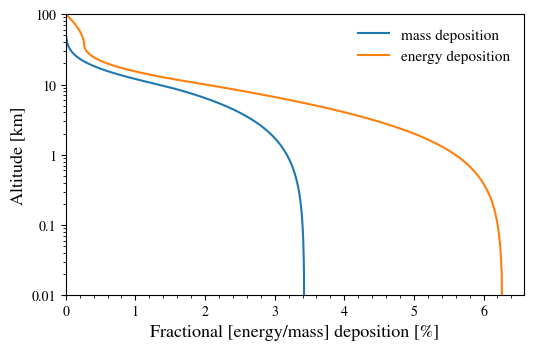

In [12]:
KE0 = 0.5 * M0 * (V0 ** 2)

_ = plt.figure(figsize=(5.91, 3.65))

plt.plot(np.cumsum(dM) / M0 * 100, z / 1e3, label=r'mass deposition')
plt.plot(np.cumsum(dEkin) / KE0 * 100, z / 1e3, label=r'energy deposition')

plt.yscale('log')

plt.xlim(0, )
plt.ylim(1e-2, 1e2)
plt.yticks([0.01, 0.1, 1, 10, 100], labels=[0.01, 0.1, 1, 10, 100])

plt.xlabel(r'Fractional [energy/mass] deposition [%]', fontsize=13)
plt.ylabel(r'Altitude [km]', fontsize=13)

plt.minorticks_on()

plt.legend(frameon=False, fontsize=11)

plt.show()